In [1]:
from pylab import*
%matplotlib inline

# Problema 1

Tenemos el oscilador armónico en dos dimensiones tal que la fuerza ejercida sobre él es: $ \vec{F} = -k\vec{r}$

Por otro lado existen dos condiciones para la fricción sobre el sistema, estas son: 

$$
\vec{f}_{fric} = \begin{cases}
        −\gamma v \hat{v} \ \ \ \ \ \ \text{ si } \ \ \vert \vec{v} \vert < 1
        \\
        −\mu v^{3/2} \hat{v} \ \ \text{ si } \ \ \vert \vec{v} \vert > 1
        \end{cases}
$$


Para los casos con $m = 1$ , $\gamma = 0.1 $ y $\mu = 0.2 $ 

## a)
### Cartesianas

Para el caso en cartesianas tenemos que : 

$$ \vec{r} = x \hat{e_x} + y \hat{e_y} $$
$$ \dot{\vec{r}} = \dot{x} \hat{e_x} + \dot{y} \hat{e_y} $$
$$ \ddot{\vec{r}} = \ddot{x} \hat{e_x} + \ddot{y} \hat{e_y} $$

Además sabemos que:  $ \\\ \vert \vec{v} \vert = \dot{x}^2 + \dot{y}^2 $ 

#### Caso 1:  
$ \dot{x}^2 + \dot{y}^2 < 1 $

$$
m\ddot{x} \hat{e_x} = (-kx -\gamma \dot{x} ) \hat{e_x}
$$

$$
m\ddot{y} \hat{e_y} = (-ky -\gamma \dot{y} ) \hat{e_y}
$$


Con el cambio de variable: $p_1 = x $  ;  $p_2 = \dot{x} $  ;  $q_1 = y $  ;  $q_2 = \dot{y} $ 

Entonces tenemos el siguiente sistema de ecuaciones diferenciales: 

$$
\left(\begin{array}{c} \dot{p_1}\\ \dot{q_1}\\ \dot{p_2} \\ \dot{q_2} \end{array}\right) = \left(\begin{array}{c} p_2  \\ q_2 \\ -\frac{k}{m}p_1 - \frac{\gamma}{m} p_2 \\  -\frac{k}{m}q_1 - \frac{\gamma}{m} q_2 \end{array}\right) 
$$


#### Caso 2: 
$ \dot{x}^2 + \dot{y}^2 > 1 $

$$
m\ddot{x} \hat{e_x} = (-kx -\mu ( \dot{x}^2 + \dot{y}^2)^{3/4} ) \hat{e_x}
$$

$$
m\ddot{y} \hat{e_y} = (-ky -\mu ( \dot{x}^2 + \dot{y}^2)^{3/4} ) \hat{e_y}
$$

Utilizando el mismo cambio de variable que para el caso 1, tenemos el sistema de ecuaciones: 

$$
\left(\begin{array}{c} \dot{p_1}\\ \dot{q_1}\\ \dot{p_2} \\ \dot{q_2} \end{array}\right) = \left(\begin{array}{c} p_2  \\ q_2 \\ -\frac{k}{m}p_1 - \frac{\mu}{m} ( p_2^2+q_2^2)^{3/4} p_2 \\  -\frac{k}{m}q_1 - \frac{\mu}{m} ( p_2^2+q_2^2)^{3/4} q_2  \end{array}\right) 
$$


Ahora vamos a juntar ambas soluciones para la ecuación de movimiento en coordenadas cartesianas: 

In [2]:
# Para la ecuacion de movimiento en coordenadas cartesianas vamos a tener: 

def cartesianas_mov(r , t , m=1. , k=1. , gamma = 0.1 , mu = 0.2): 
    #r = [x,y,vx,vy] = [p1,q1,p2,q2] segun la def del cambio de variable
    p1,q1,p2,q2 = r[0] , r[1] , r[2] , r[3] 
    norma_v = sqrt(p2**2 + q2**2)
    
    dp1 , dq1 = p2 , q2
    
    if norma_v <= 1 : 
        
        dp2 = -(k/m)*p1 -(gamma/m)*p2
        dq2 = -(k/m)*q1 -(gamma/m)*q2
        
    else : 
        
        dp2 = -(k/m)*p1 -(mu/m)*p2*(norma_v)**(3/2)
        dq2 = -(k/m)*q1 -(mu/m)*q2*(norma_v)**(3/2)
    
    return array([dp1 ,dq1 ,dp2 ,dq2])

### Polares

Haciendo el cambio de variable : 

$\hat{e_r} = cos\theta \hat{e_x} + sen\theta \hat{e_y} $ 

$\hat{e_\theta} = -sen\theta \hat{e_x} + cos\theta \hat{e_y} $

$r = \sqrt{x^2 + y^2 }$

Tenemos que : 

$\dot{r} = \dot{r} \hat{e_r} + r\dot{\theta} \hat{e_\theta}$
$ \ddot{\vec{r}} = (\ddot{r} -r\dot{\theta}^2)\hat{e_r} + (2\dot{r}\dot{\theta} + r\ddot{\theta})\hat{e_\theta} $

De la misma forma tenemos dos casos: 

#### Caso 1: 

$\dot{r}^2 + r^2\dot{\theta}^2 < 1$

$(m(\ddot{r} - r\dot{\theta}^2)) \hat{e_r} = ( -kr -\gamma \dot{r}) \hat{e_r}$

$(m(2\dot{r}\dot{\theta} + r\ddot{\theta})) \hat{e_\theta} = -\gamma r\dot{\theta} \hat{e_\theta}$

Haciendo el cambio de coordenadas:    $p_1 = r$ ; $q_1 = \theta$ ; $p_2 = \dot{r}$ ; $q_2 = \dot{\theta}$

$$
\left(\begin{array}{c} \dot{p_1}\\ \dot{q_1}\\ \dot{p_2} \\ \dot{q_2} \end{array}\right) = \left(\begin{array}{c} p_2  \\ q_2 \\ (q_2^2 - \frac{k}{m})p_1 - \frac{\gamma}{m} p_2 \\  -(2\frac{p_2}{p_1} + \frac{\gamma}{m})q_2 \end{array}\right) 
$$

#### Caso 2 : 

$\dot{r}^2 + r^2\dot{\theta}^2 > 1$

$(m(\ddot{r} - r\dot{\theta}^2)) \hat{e_r} = (-kr -\mu (\dot{r}^2 + r^2\dot{\theta}^2)^{3/4}) \hat{e_r}$

$(m(2\dot{r}\dot{\theta} + r\ddot{\theta})) \hat{e_\theta} = -\mu (\dot{r}^2 + r^2\dot{\theta}^2) \hat{e_\theta} $


De la misma forma para este caso utilizando el mismo cambio de variable: 

$$
\left(\begin{array}{c} \dot{p_1}\\ \dot{q_1}\\ \dot{p_2} \\ \dot{q_2} \end{array}\right) = \left(\begin{array}{c} p_2  \\ q_2 \\ (q_2^2 - \frac{k}{m})p_1 - \frac{\mu}{m}((p_2^2+p_1^2q_2^2)^{3/4}) p_2 \\  -(2\frac{p_2}{p_1} + \frac{\mu}{m}(p_2^2+p_1^2q_2^2)^{3/4})q_2 \end{array}\right) 
$$

Al igual que en las cartesianas, definimos a la ecuación de movimiento en polares:

In [3]:
def polares_mov(r, t, m = 1., k= 1., gamma = .1, mu = .2):  
    #r = [r, theta, dr, dtheta]
    p1, q1, p2, q2 = r[0], r[1], r[2], r[3]  
    norm_v = sqrt(p2**2 +(p1*q2)**2) 
    
    dp1, dq1 = p2, q2
        
    if p1 != 0 and norm_v <=1 : 
        
        dp2 = (q2**2-(k/m))*p1 - (gamma/m)*p2
        dq2 = -(2*(p2/p1) + (gamma/m))*q2
    
    elif p1 != 0 and norm_v >1 :
        
        dp2 = (q2**2 - (k/m))*p1 -(mu/m)*p2*(norm_v)**(3/2)
        dq2 = -(2*(p2/p1) + (mu/m)*q2*(norm_v)*(3/2))
    
    elif p1 == 0 and norm_v <= 1 : 
        
        dp2 = (q2**2-(k/m))*p1 - (gamma/m)*p2
        dq2 = 0                                     #Esto paso porque en la primera version de este codigo no
                                                    #corria la parte de polares con las condiciones iniciales
                                                    #por tener una division entre cero, entonces hay que hacer 4 casos
    else : 
        
        dp2 = (q2**2 - (k/m))*p1 -(mu/m)*p2*(norm_v)**(3/2)
        dq2 = 0
        
    return array([dp1, dq1, dp2, dq2])


## b)

Entonctrar las soluciones con RK-4to orden para $\vec{r_0} = (0,1) $   ;   $\vec{v_0} = (cos\theta, sen\theta) $  

Para $\theta = \frac{n\pi}{6} $ con $n= 0,1,2,...,11$

In [4]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    if (x[1]-x[0]) <= 5.*h:
        h = (x[1]-x[0])/10
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

In [5]:
theta = (arange(0,12,1)*pi)/6
tiempo = 100 #numeros chicos para ahorrar tiempo de mi computadora

### Cartesianas

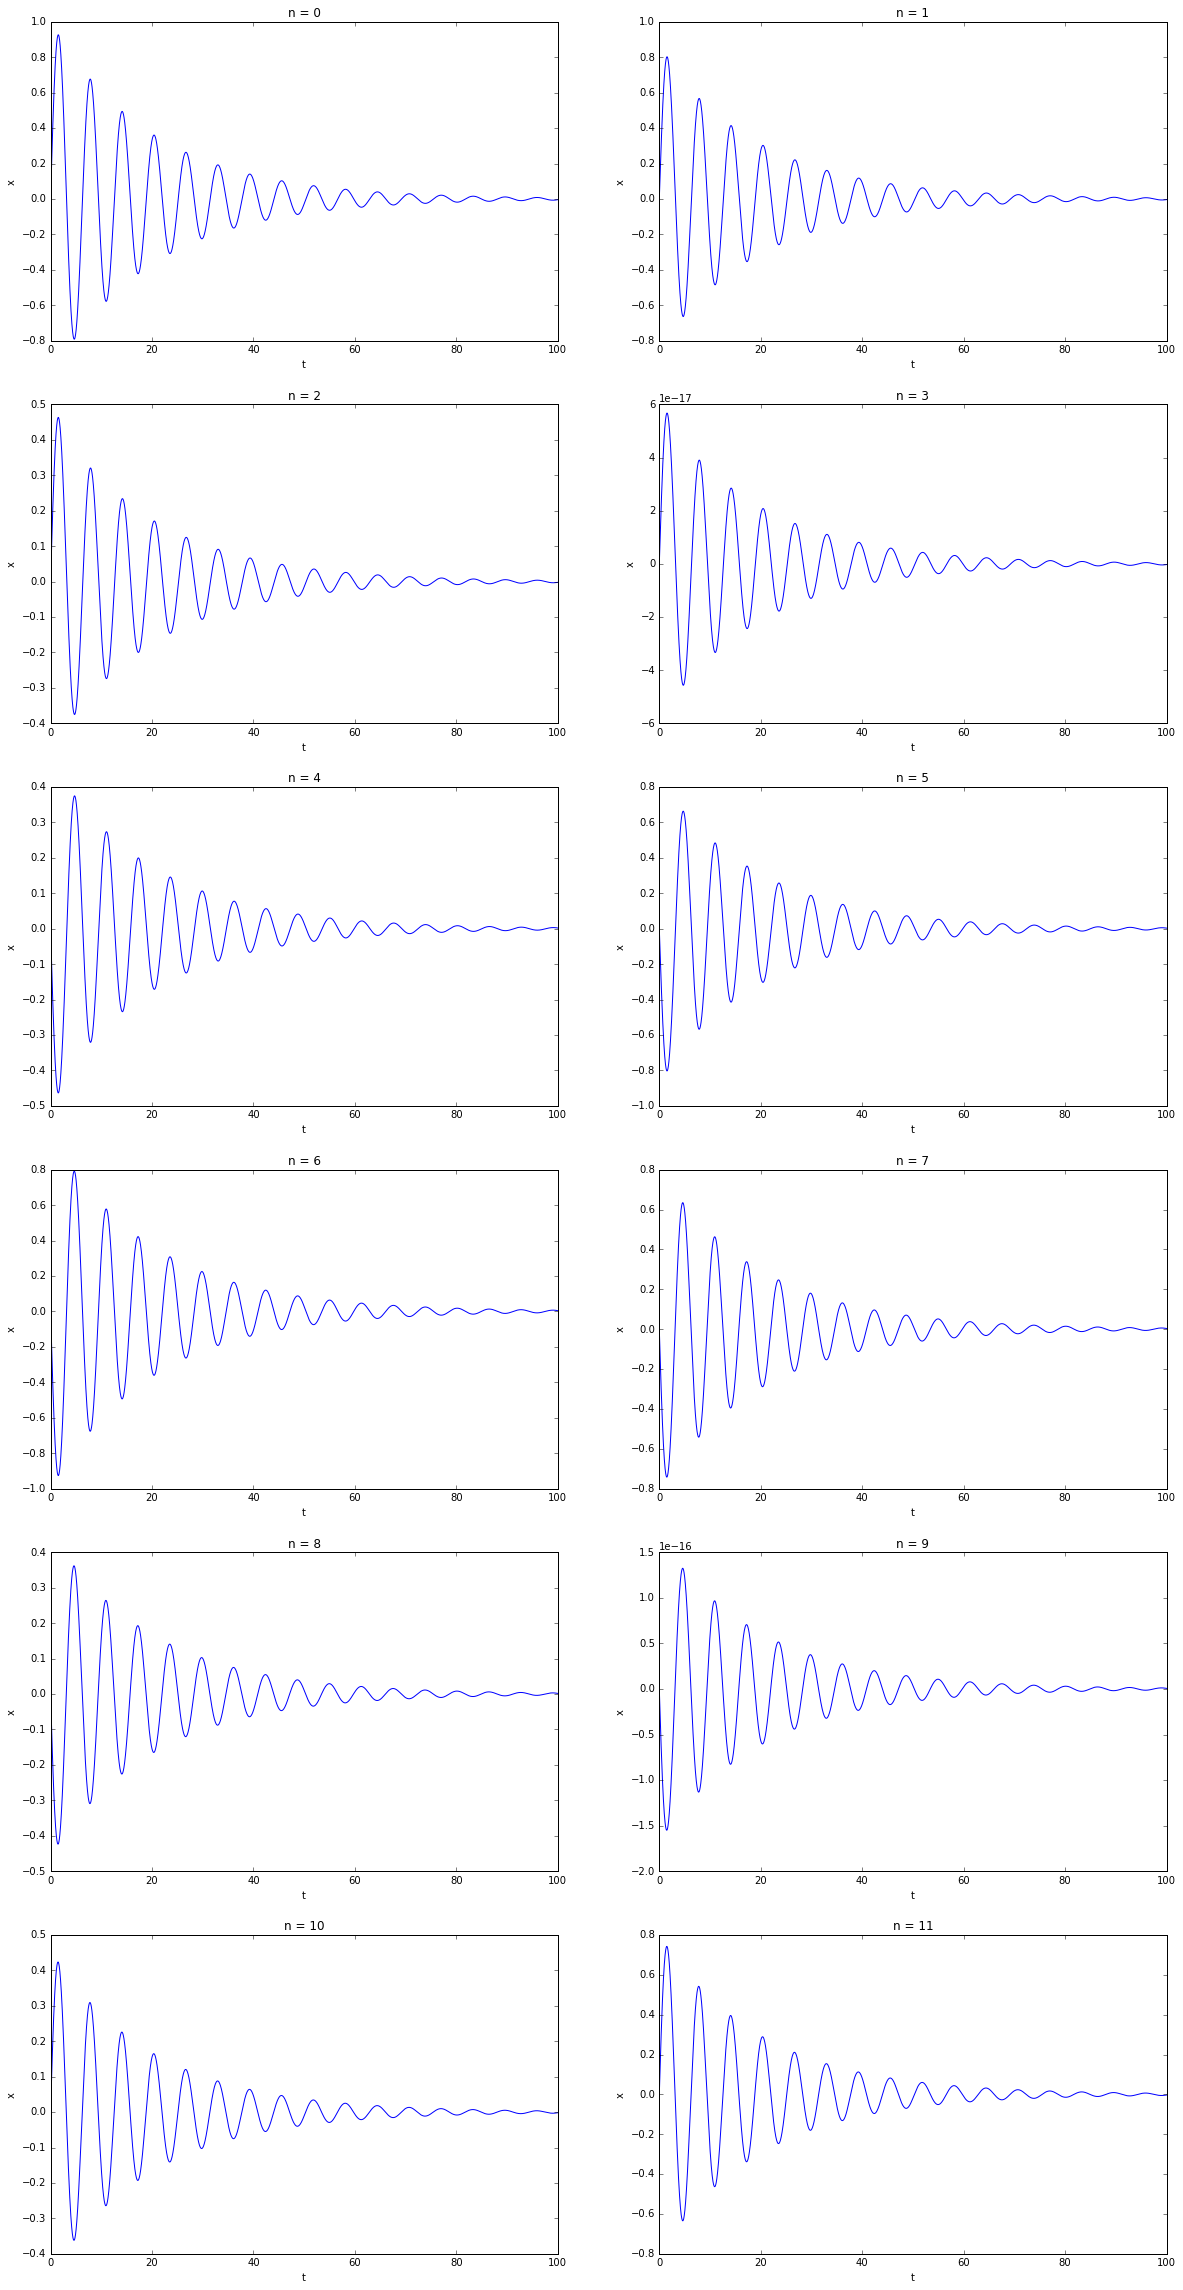

In [6]:
fig, ax = plt.subplots(figsize=(20, 40))

for n in xrange(len(theta)): #como tenemos muchos valores de n y no me voy a poner a graficar 12 sub.plots...
                             #definimos un for en el que se corran los valores de n y por lo tanto de theta
    
    cond_ini = [0,1,cos(theta[n]),sin(theta[n])]
    t_cartesianas, sol_cartesianas = rk4(cartesianas_mov, cond_ini, [0,tiempo])
    
    subplot(6,2,n+1)
    
    title('n = %s' %(str(n))),xlabel('t'),ylabel('x')
    #plot(sol_cartesianas[:,0], sol_cartesianas[:,1]) #para las sol. en el plano xy
    plot(t_cartesianas, sol_cartesianas[:,0])         #para las soluciones t vs x
    #plot(t_cartesianas, sol_cartesianas[:,1])         #podemos ver como todas oscilan y se van amortiguando
show()

### Polares

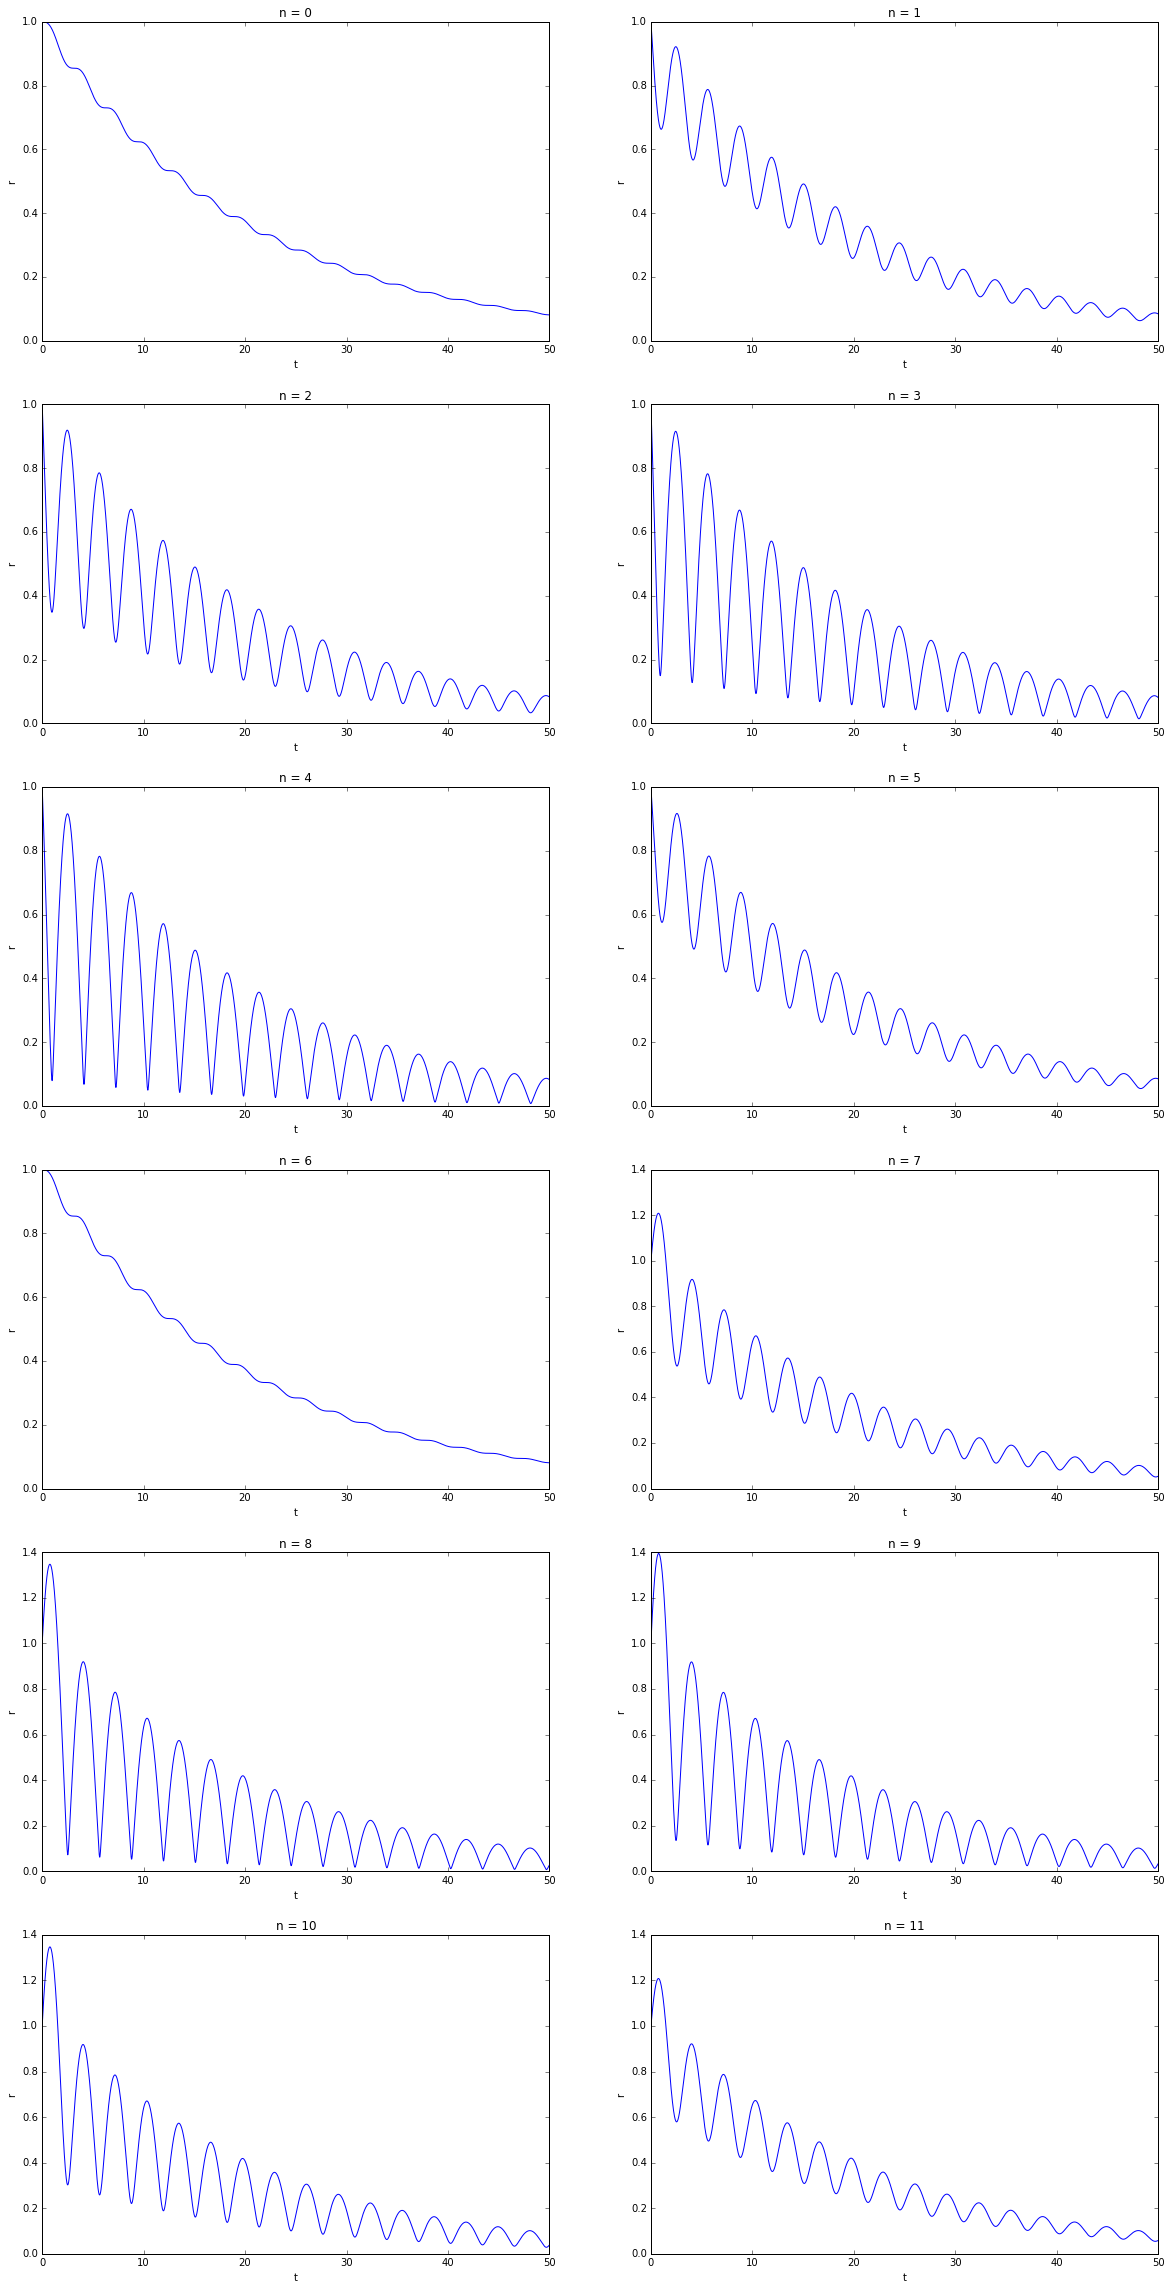

In [7]:
tiempo = 50

fig, ax = plt.subplots(figsize=(20, 40))
for n in xrange(len(theta)): #como tenemos muchos valores de n y no me voy a poner a graficar 12 sub.plots...
                             #definimos un for en el que se corran los valores de n y por lo tanto de theta
    
    condiciones_iniciales=[1,pi/2,-sin(theta[n]),cos(theta[n])]
    t_polares , sol_polares = rk4(polares_mov , condiciones_iniciales , [0,tiempo] )
    subplot(6,2,n+1)
    
    title('n = %s' %(str(n))),xlabel('t'),ylabel('r')
    #plot(sol_polares[:,0], sol_polares[:,1]) 
    plot(t_polares, sol_polares[:,0])
    #plot(t_polares, sol_polares[:,1])
                                                      
show()

### C) 

Queremos ahora encontrar la energía de nuestro oscilador... 

Entonces tenemos que la energía del sistema está dada por la suma de la energía potencial $U= \frac{1}{2}kr^2=\frac{k}{2}(x^2+y^2$  y la cinética : $K= \frac{1}{2}m\dot{r}^2=\frac{m}{2}(\dot{x}^2+\dot{y}^2)$

Entonces la energía total estará dada por: 

$$
E= U+K = \frac{1}{2} (kx^2 + m\dot{x}^2 + ky^2 + m\dot{y}^2) = \frac{1}{2} (p_x^2+p_y^2) + \frac{1}{2} (x^2 +y^2)
$$

In [8]:
def Energia(r ,k =1. , m=1.):
    #r=[x,y,vx,vy]
    
    x,y,px,py = r[:,0],r[:,1],m*r[:,2],m*r[:,3]
    E = 0.5*(px**2 + py**2) + 0.5*k*(x**2 + y**2)
    return E

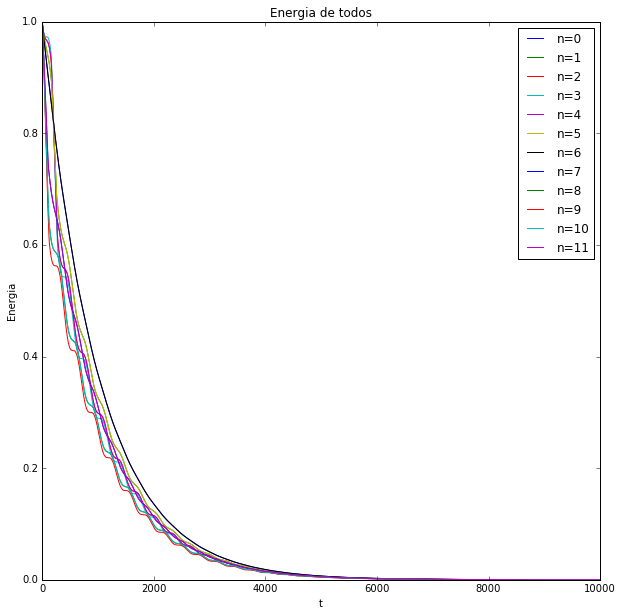

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
tiempo = 100
title(r'Energia de todos'),xlabel('t'),ylabel('Energia')
for n in xrange(len(theta)): 
    
    cond_ini = [0,1,cos(theta[n]),sin(theta[n])]
    t_cartesianas, sol_cartesianas = rk4(cartesianas_mov, cond_ini, [0,tiempo])
    e_cartesianas = Energia(sol_cartesianas)
    
    #falta ponerles nombres a los colores
    plot(e_cartesianas,label = 'n=%s' %(n))   
ax.legend()    
show()

Ahora lo que queremos es que todo se detenga para cuando la energía es menor al 1% . Para esto vamos a modificar el método de RK-4 tal que no regrese de una vez también el valor de la energía

### d) 

Para el momento angular tenemos que $\vec{L}=\vec{r} \times \vec{p} $ pero como sólo tenemos componente en X y Y, entonces $z=p_z=0$  entonces:

$$
\vec{L}=L_z=(xp_y-yp_x)\hat{z}
$$


In [16]:
def Momento(r , m=1.):
    #r=[x,y,vx,vy]
    
    L = r[:,0]*m*r[:,3] - r[:,1]*m*r[:,2]
    return L

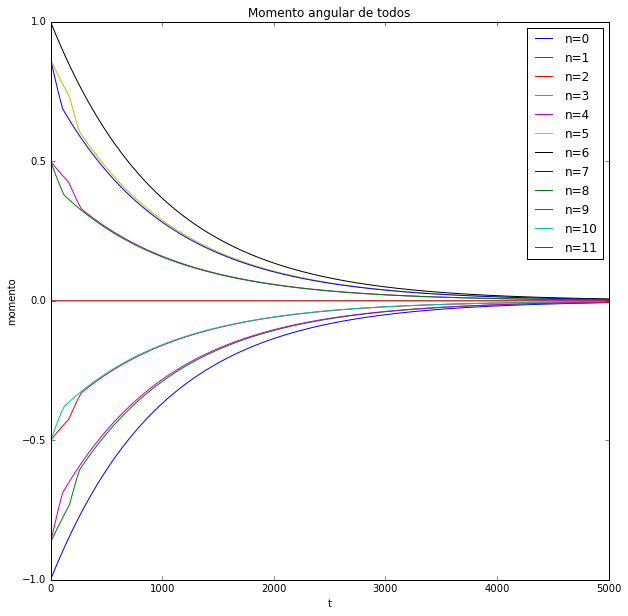

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
tiempo = 50
title(r'Momento angular de todos'),xlabel('t'),ylabel('momento')
for n in xrange(len(theta)): 
    
    cond_ini = [0,1,cos(theta[n]),sin(theta[n])]
    t_cartesianas, sol_cartesianas = rk4(cartesianas_mov, cond_ini, [0,tiempo])
    l_cartesianas = Momento(sol_cartesianas)
    
    #falta ponerles nombres a los colores
    plot(l_cartesianas,label = 'n=%s' %(n))   
ax.legend()    
show()

### e) 

Para una condición dada de la vida $(p_x,x)$ y $(p_\rho,\rho)$

Sabemos que la velocidad inicial será : $\dot{\vec{r}_0} = (\cos \theta , \sin \theta)$

Tomemos a $m=1$  ; $k=0.5$

$\rho = \sqrt{x^2+y^2}$

$\theta = arctan(\frac{y}{x})$

In [18]:
def rho(x,y):
    return sqrt(x**2+y**2)

def theta(x,y):
    return arctan(y/x)

def p_rho(x,y,vx,vy):
    return (vx*x+vy*y)/rho(x,y)

#### Espacio fase $(p_x , x)$

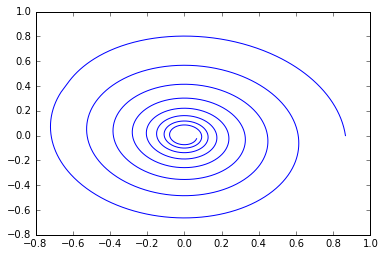

In [19]:
#Esta es una solución solita
cond_ini = [0,1,cos(pi/6.),sin(pi/6.)]
t_ej, sol_ej = rk4(cartesianas_mov, cond_ini, [0,50])
plot(sol_ej[:,2],sol_ej[:,0])

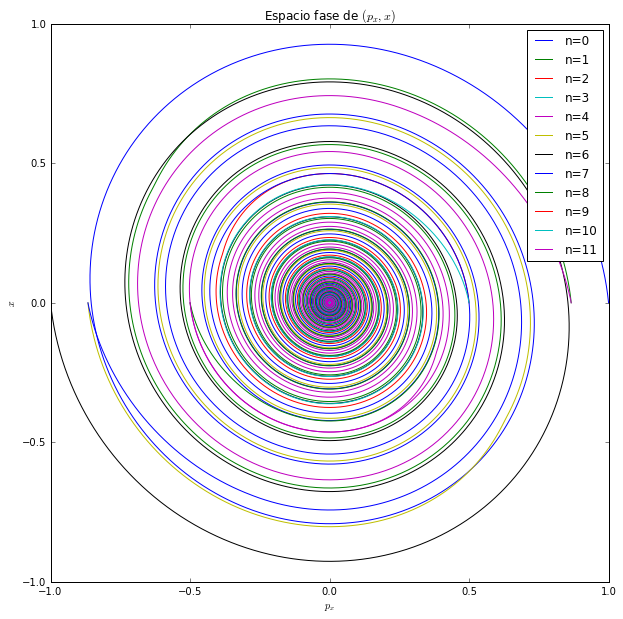

In [24]:
#Estas son todas las soluciones

theta = (arange(0,12,1)*pi)/6
tiempo = 100 
fig, ax = plt.subplots(figsize=(10, 10))
title('Espacio fase de $(p_x,x)$'), xlabel('$p_x$'),ylabel('$x$')
for n in xrange(len(theta)):
    
    cond_ini = [0,1,cos(theta[n]),sin(theta[n])]
    t_cartesianas, sol_cartesianas = rk4(cartesianas_mov, cond_ini, [0,tiempo])
    
    
    plot(sol_cartesianas[:,2], sol_cartesianas[:,0],label = 'n=%s' %(n)) 
ax.legend()     
show()

#### Espacio fase $(p_\rho , \rho)$

In [ ]:
#Espacio fase de la solución solita y feliz que tomamos arriba je

radio=rho(sol_ej[:,0],sol_ej[:,1])
p_r=p_rho(sol_ej[:,0],sol_ej[:,1],sol_ej[:,2],sol_ej[:,3])
plot(radio,p_r)